In [ ]:
import cv2
from google.colab import files
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
import heapq
import math
import sys, random
from queue import PriorityQueue
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [ ]:
o1=[(0,50),(50,50),(50,60),(0,60)]
o2=[(65,50),(120,50),(120,60),(65,60)]
o3=[(50,60),(30,80),(40,60)]
o4=[(65,60),(70,60),(50,80)]
o5=[(50,50),(60,30),(40,50)]
o6=[(65,50),(80,30),(70,50)]

global obs
obs=[o1,o2,o3,o4,o5,o6]
length=10
breadth=5
k=20 # k nearest neighbour
sample=[]

3
2
1


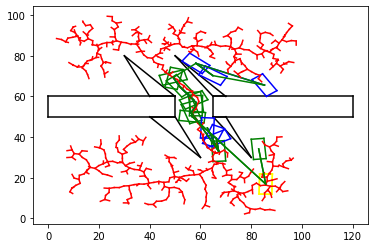

In [ ]:
def direction(a,b,c):
  mod=(b[1]-a[1])*(c[0]-b[0])-(b[0]-a[0])*(c[1]-b[1])
  if mod==0.0:
    return 0
  elif mod<0.0:
    return 1
  else:
    return 2

def online(a,b,c):
  if (c[0]<= max(a[0],b[0]) and c[0]>=min(a[0],b[0])) and (c[1]<=max(a[1],b[1]) and c[1]>=min(a[1],b[1])) :
    return True
  else:
    return False

def check_lines(p1,p2,q1,q2):
  dir1=direction(p1,p2,q1)
  dir2=direction(p1,p2,q2)
  dir3=direction(q1,q2,p1)
  dir4=direction(q1,q2,p2)
  flag=0

  if dir1!=dir2 and dir3!=dir4 :
    flag=1

  if (dir1==0 and online(p1,p2,q1) ==True) or (dir2==0 and online(p1,p2,q2)==True) or (dir3==0 and online(q1,q2,p1)==True) or (dir4==0 and online(q1,q2,p2)==True) :
    flag=1

  if flag==1:
    return True #intersect
  else:
    return False #not intersect

def plot(o1,col):
  for i in range(len(o1)):
    p1=o1[i]
    p2=o1[(i+1)%len(o1)]
    x_values = [p1[0], p2[0]]
    y_values = [p1[1], p2[1]]
    plt.plot(x_values, y_values,color=col)


for k in range(len(obs)):
  poly1=obs[k]
  plot(poly1,'black')

def get_corners(theta,X,Y):
  l=length/2
  b=breadth/2
  theta=theta*(math.pi/180)
  C1=(X+l*math.cos(theta)+b*math.cos(math.pi/2+theta),Y+l*math.sin(theta)+b*math.sin(math.pi/2+theta))
  C2=(X-l*math.cos(theta)+b*math.cos(math.pi/2+theta),Y-l*math.sin(theta)+b*math.sin(math.pi/2+theta))
  C3=(X-l*math.cos(theta)-b*math.cos(math.pi/2+theta),Y-l*math.sin(theta)-b*math.sin(math.pi/2+theta))
  C4=(X+l*math.cos(theta)-b*math.cos(math.pi/2+theta),Y+l*math.sin(theta)-b*math.sin(math.pi/2+theta))
  return C1,C2,C3,C4

def check_poly(point,thet):
  mark=0
  theta=thet
  X=point[0]
  Y=point[1]
  c1,c2,c3,c4=get_corners(theta,X,Y)
  rect=[c1,c2,c3,c4]
  for k in range(len(obs)):
    flag1=0
    flag2=0
    poly1=obs[k]
    x=0
    y=0
    for i in range(len(poly1)):
      x+=poly1[i][0]
      y+=poly1[i][1]

    center1=(x/len(poly1),y/len(poly1))
    center2=(point[0],point[1])
    for i in range(len(poly1)):
      p1=poly1[i]
      p2=poly1[(i+1)%len(poly1)]
      for j in range(len(rect)):
        q1=rect[j]
        q2=rect[(j+1)%len(rect)]
        if check_lines(p1,p2,q1,q2)==True:
          mark=1
          break
      if mark==1:
        break

    #2nd in 1st
    for i in range(len(poly1)):
      p1=poly1[i]
      p2=poly1[(i+1)%len(poly1)]
      dir1=direction(p1,p2,center1)
      dir2=direction(p1,p2,center2) #center2 as point 
      if dir1!=dir2:
        flag1=1
        break 

    #1st in 2nd
    for i in range(len(rect)):
      p1=rect[i]
      p2=rect[(i+1)%len(rect)]
      dir1=direction(p1,p2,center1)
      dir2=direction(p1,p2,center2)
      if dir1!=dir2:
        flag2=1
        break

    if mark==1:
      return True #intersect
    elif flag1==0 or flag2==0:
      return True;

  return None;  


def check_collision(s1,s2,delta):
  lambada=0.0
  h1=min(1,delta/math.sqrt((sample[s1][0]-sample[s2][0])**2+(sample[s1][1]-sample[s2][1])**2))

  while lambada<=1.0:
    px=sample[s1][0]*lambada+(1-lambada)*sample[s2][0]
    py=sample[s1][1]*lambada+(1-lambada)*sample[s2][1]
    theto=sample[s1][2]*lambada+(1-lambada)*sample[s2][2]
    pt=(px,py)
    if check_poly(pt,theto)==True :
      return True #collide
    else:
      lambada+=h1

global arr
arr=[]
def root(arr,x):
  while arr[x]!=x:
    x=arr[x]
  return x

def union(arr , a , b):
  root_a = root(arr, a)     
  root_b = root(arr, b) 
  arr[ root_b ] = root_a 

def find( arr,A,B):
  if root(arr,A)==root(arr,B) :       
    return True
  else:
    return False



ss=0
for i in range(6000):
  arr.append(ss)
  ss+=1

while len(sample)!=10: #bridge test for narrow corridor
    x1 = random.uniform(1.0,120.0)
    y1 = random.uniform(1.0,120.0)
    theta1 = random.uniform(0.0,180.0)
    point=(x1,y1)
    if check_poly(point,theta1)==True:
      x2=x1+random.uniform(-15.0,15.0)
      y2=y1+random.uniform(-15.0,15.0)
      theta2=(theta1+random.uniform(-30.0,30.0)+180.0)%180.0
      q2=(x2,y2)
      if check_poly(q2,theta2)==True :
        x3=(x1+x2)/2.0
        y3=(y1+y2)/2.0
        theta3=(theta1+theta2)/2.0
        q3=(x3,y3)
        if check_poly(q3,theta3)==None:
          c1,c2,c3,c4=get_corners(theta3,x3,y3)
          rect=[c1,c2,c3,c4]
          plot(rect, 'green' )
          sample.append((x3,y3,theta3))

z=0
while z<20: #obstacle based sampling
  x1 = random.uniform(1.0,120.0)
  y1 = random.uniform(1.0,120.0)
  theta1 = random.uniform(0.0,180.0)
  point1=(x1,y1)
  z+=1
  if check_poly(point1,theta1)==True :
    x2=random.uniform(1.0,120.0)
    y2=random.uniform(1.0,120.0)
    theta2=random.uniform(0.0,180.0)
    point2=(x2,y2)
    if check_poly(point2,theta2)==None:
      meu=0.0
      h=min(1,1/((x1-x2)**2+(y1-y2)**2))
      while meu<=1.0:
        px=x2*meu+(1-meu)*x1
        py=y2*meu+(1-meu)*y1
        thet=theta2*meu+(1-meu)*theta1
        pt=(px,py)
        if check_poly(pt,thet)==None:
          sample.append((px,py,thet))
          c1,c2,c3,c4=get_corners(thet,px,py)
          rect=[c1,c2,c3,c4]
          plot(rect,'blue')
          break
        else:
          meu+=h


z=0
while z<10: #Gaussian sampling
  x1 = random.uniform(1.0,120.0)
  y1 = random.uniform(1.0,120.0)
  theta1 = random.uniform(0.0,180.0)
  point1=(x1,y1)
  z+=1
  if check_poly(point1,theta1)==True :
    x2=random.uniform(1.0,120.0)
    y2=random.uniform(1.0,120.0)
    theta2=random.uniform(0.0,180.0)
    point2=(x2,y2)
    if check_poly(point2,theta2)==None:
      meu=0.0
      h=min(1,1/math.sqrt((x1-x2)**2+(y1-y2)**2))
      while meu<=1.0:
        px=x2*meu+(1-meu)*x1
        py=y2*meu+(1-meu)*y1
        thet=theta2*meu+(1-meu)*theta1
        pt=(px,py)
        if check_poly(pt,thet)==None:
          sigma=min(1,3/math.sqrt((px-x2)**2+(py-y2)**2))
          dx=x2*sigma+(1-sigma)*px
          dy=y2*sigma+(1-sigma)*py
          dtheta=theta2*sigma+(1-sigma)*thet
          dt=(dx,dy)
          if check_poly(dt,dtheta)==None:
            sample.append((dx,dy,dtheta))
            c1,c2,c3,c4=get_corners(dtheta,dx,dy)
            rect=[c1,c2,c3,c4]
            plot(rect,'red')
            break
        meu+=h


global vis
adj=[[]*1 for _ in range(6000)]
vis=[0]*len(sample)
for i in range(len(sample)):
  q = PriorityQueue()
  x=k
  for j in range(len(sample)):
    if i!=j:
      q.put((math.sqrt((sample[i][0]-sample[j][0])**2+(sample[i][1]-sample[j][1])**2),j))
  while x>0 and not q.empty():
    p=q.get()
    if check_collision(i,p[1],1)==None :
      adj[i].append(p[1])
      adj[p[1]].append(i)
      x-=1

vis=[0]*len(sample)

def dfs(s,col):
  vis[s]=1
  for i in range(len(adj[s])):
    x=adj[s][i]
    if vis[x]==0 :
      union(arr,s,x)
      x_values = [sample[x][0], sample[s][0]]
      y_values = [sample[x][1], sample[s][1]]
      plt.plot(x_values, y_values,color=col)
      dfs(x,col)

c=0
for i in range(len(sample)):
  if vis[i]==0:
    vis[i]=1
    dfs(i,'blue')
    c+=1

print(c)
vis=[0]*6000

z=0
while z<25:      #If a sample connects two disjoint components
  x = random.uniform(1.0,120.0)
  y = random.uniform(1.0,120.0)
  theta = random.uniform(0.0,180.0)
  point=(x,y)
  z+=1
  
  if check_poly(point,theta)==None:
    sample.append((x,y,theta))
  else:
    continue
  flag=0
  mark=[]
  dark=[]
  for i in range(len(sample)-1):
    if check_collision(i,len(sample)-1,1)==None and mark.count(root(arr,i))==0 :
      flag+=1;
      mark.append(root(arr,i))
      dark.append(i)

  if flag>=2 :
    for j in range(len(dark)):
      union(arr,dark[j],len(sample)-1)
      adj[len(sample)-1].append(dark[j])
      adj[dark[j]].append(len(sample)-1)
      c1,c2,c3,c4=get_corners(theta,x,y)
      rect=[c1,c2,c3,c4]
      plot(rect,'yellow')
    continue

  sample.pop()

vis=[0]*len(sample)
c=0
for i in range(len(sample)):
  if vis[i]==0:
    vis[i]=1
    dfs(i,'green')
    c+=1

print(c)

qq=PriorityQueue()
for i in range(len(sample)):
  for j in range(len(sample)):
    if(root(arr,i)!=root(arr,j)):
      qq.put((math.sqrt((sample[i][0]-sample[j][0])**2+(sample[i][1]-sample[j][1])**2),i,j))

global dummy
global dummy_adj


def RRT(s,g):
  flag=0
  dummy=[]
  dummy_adj=[[]*1 for _ in range(6000)]
  dummy.append((sample[s][0],sample[s][1],sample[s][2]))
  while True:
    qrand_x=random.uniform(1.0,100.0)
    qrand_y=random.uniform(1.0,100.0)
    rand_theta=random.uniform(0.0,180.0)
    point=(qrand_x,qrand_y)
    if check_poly(point,rand_theta)==None:
      q=PriorityQueue()
      for i in range(len(dummy)):
        q.put(((math.sqrt((qrand_x-dummy[i][0])**2+(qrand_y-dummy[i][1])**2)),i))

      qnear=q.get()
      qnearx=dummy[qnear[1]][0]
      qneary=dummy[qnear[1]][1]
      near_theta=dummy[qnear[1]][2]
      lambdaa=min(1,2/(math.sqrt((qrand_x-qnearx)**2+(qrand_y-qneary)**2))) 
      px=qrand_x*lambdaa+(1-lambdaa)*qnearx
      py=qrand_y*lambdaa+(1-lambdaa)*qneary
      new_theta=rand_theta*lambdaa+(1-lambdaa)*near_theta
      qnew=(px,py)
      if check_poly(qnew,new_theta)==None:
        x_values = [px, qnearx]
        y_values = [py, qneary]
        plt.plot(x_values, y_values,'red')
        dummy.append((px,py,new_theta))
        dummy_adj[qnear[1]].append(len(dummy)-1)
        if math.sqrt((px-sample[g][0])**2+(py-sample[g][1])**2)<5:
          return True

if not qq.empty() :
  src=qq.get()
  if RRT(src[1],src[2])==True :
    adj[src[1]].append(src[2])
    union(arr,src[1],src[2])
    

vis=[0]*len(sample)
c=0
for i in range(len(sample)):
  if vis[i]==0:
    vis[i]=1
    dfs(i,'green')
    c+=1

print(c)
